In [1]:
from importlib.metadata import version

print("torch version:", version("torch"))

torch version: 2.6.0+cu124


##**Simplified Self-Attention**


#### Attention Score

In [2]:
import torch

inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x-1)
   [0.55, 0.87, 0.66], # journey  (x-2)
   [0.57, 0.85, 0.64], # starts   (x-3)
   [0.22, 0.58, 0.33], # with     (x-4)
   [0.77, 0.25, 0.10], # one      (x-5)
   [0.05, 0.80, 0.55]] # step     (x-6)
)

In [3]:
query = inputs[1]
attention_2 = torch.zeros(inputs.shape[0])
for i ,x_i in enumerate(inputs):
  attention_2[i] = torch.dot(x_i ,query)
print("Attention score for query(journey) is:" ,attention_2)

Attention score for query(journey) is: tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


#### Attention Weight - Normalizing Attention score

In [4]:
atn_wt_2_tmp = attention_2/attention_2.sum()
print("Attention weights (normalized attention score for query ): " ,atn_wt_2_tmp)
print("sum of attention weight : " ,atn_wt_2_tmp.sum())

Attention weights (normalized attention score for query ):  tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
sum of attention weight :  tensor(1.0000)


In [5]:
def softmax_naive(x):
  return torch.exp(x)/torch.exp(x).sum()
atn_wt2_naive = softmax_naive(attention_2)
print("Attention weights (normalized attention score for query ): " ,atn_wt2_naive)
print("sum of attention weight : " ,atn_wt2_naive.sum())

Attention weights (normalized attention score for query ):  tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
sum of attention weight :  tensor(1.)


In [6]:
attn_weights_2 = torch.softmax(attention_2,dim=0)
print("Attention weights (normalized attention score for query ): " ,attn_weights_2)
print("sum of attention weight : " ,attn_weights_2.sum())

Attention weights (normalized attention score for query ):  tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
sum of attention weight :  tensor(1.)


#### Context Vector

In [7]:
query = inputs[1]
context_v2 = torch.zeros(query.shape)
for i ,x_i in enumerate(inputs):
  context_v2 += attn_weights_2[i]*x_i
print("context vector for query : " , context_v2)

context vector for query :  tensor([0.4419, 0.6515, 0.5683])


#### Calculating  for whole inputs

In [8]:
attn_score = torch.zeros(6,6)
for i ,x_i in enumerate(inputs):
  for j, x_j in enumerate(inputs):
    attn_score[i,j] = torch.dot(x_i ,x_j)
print("Attention sCore for all inputs : " , attn_score)


Attention sCore for all inputs :  tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [9]:
attn_score = inputs@inputs.T
print("Attention sCore for all inputs : \n" , attn_score)

Attention sCore for all inputs : 
 tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [10]:
attn_weights = torch.softmax(attn_score ,dim=-1)
print("Attention weights for all inputs :\n " , attn_weights)
print("\n sum of attention weights :\n" ,attn_weights.sum(dim=-1))

Attention weights for all inputs :
  tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])

 sum of attention weights :
 tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])


In [11]:
context_vecs = attn_weights@inputs
print("Context vectors for all inputs :\n" , context_vecs)

Context vectors for all inputs :
 tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])


In [12]:
print("previous 2nd context vector : ", context_v2)

previous 2nd context vector :  tensor([0.4419, 0.6515, 0.5683])


##**Self-Attention With Trainable Weights**

In [13]:
x_2 = inputs[1]
d_in = x_2.shape[0]
d_out = 2

In [14]:
torch.manual_seed(123)
W_query =  torch.nn.Parameter(torch.rand(d_in,d_out) ,requires_grad =False)
W_key = torch.nn.Parameter(torch.rand(d_in,d_out) ,requires_grad=False)
W_value = torch.nn.Parameter(torch.rand(d_in,d_out) ,requires_grad =False)


In [15]:
query_2 = x_2@W_query
key_2 = x_2@W_key
value_2  =x_2@W_value
print("query : " ,query_2)
print("key : " ,key_2)
print("value : " ,value_2)

query :  tensor([0.4306, 1.4551])
key :  tensor([0.4433, 1.1419])
value :  tensor([0.3951, 1.0037])


In [16]:
keys = inputs@W_key
values =inputs@W_value

print("keys shape :" , keys.shape)
print("values value : " ,values.shape )

keys shape : torch.Size([6, 2])
values value :  torch.Size([6, 2])


In [17]:
keys_2 = keys[1]
keys_2

tensor([0.4433, 1.1419])

In [18]:
attn_score_22 = query_2@keys_2.T
print("Attention score for query(journey) with journey : " ,attn_score_22)

Attention score for query(journey) with journey :  tensor(1.8524)


<ipython-input-18-57c4d3e1e6e2>:1: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3725.)
  attn_score_22 = query_2@keys_2.T


In [19]:
attn_score_2 = query_2@keys.T
print("Attention score for query(journey) with all inputs : " ,attn_score_2)


Attention score for query(journey) with all inputs :  tensor([1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440])


In [20]:
d_k = keys.shape[-1]
attn_weights_2 = torch.softmax(attn_score_2/d_k**0.5 ,dim=-1)
print("Attention weights (normalized attention score for query ): " ,attn_weights_2)
print("sum of attention weight : " ,attn_weights_2.sum())

Attention weights (normalized attention score for query ):  tensor([0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820])
sum of attention weight :  tensor(1.)


In [21]:
context_v2 = attn_weights_2@values
print("context vector for query : " , context_v2)

context vector for query :  tensor([0.3061, 0.8210])


#### Compact Self -Attention Class

In [22]:
import torch.nn as nn
class SelfAttention_v1(nn.Module):
  def __init__ (self ,d_in ,d_out):
    super().__init__()
    self.W_query = nn.Parameter(torch.rand(d_in,d_out))
    self.W_key = nn.Parameter(torch.rand(d_in ,d_out))
    self.W_value = nn.Parameter(torch.rand(d_in ,d_out))

  def forward(self ,x):
    queries = x@self.W_query
    keys = x@self.W_key
    values = x@self.W_value
    attn_score = queries@keys.T
    attn_weights = torch.softmax(attn_score/keys.shape[-1]**0.5 ,dim=-1)
    context_vec = attn_weights@values
    return context_vec

In [23]:
torch.manual_seed(123)
self_attn_v1 = SelfAttention_v1(d_in,d_out)
context_vecs_v1 = self_attn_v1(inputs)
print("Context vectors for all inputs :\n" , context_vecs_v1)

Context vectors for all inputs :
 tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]], grad_fn=<MmBackward0>)


In [24]:
class SelfAttention_v2(nn.Module):
  def __init__ (self , d_in ,d_out ,qkv_bias =False):
    super().__init__()
    self.W_query = nn.Linear(d_in ,d_out ,bias =qkv_bias)
    self.W_key = nn.Linear(d_in ,d_out ,bias =qkv_bias)
    self.W_value = nn.Linear(d_in, d_out , bias =qkv_bias)

  def forward(self ,x):
    queries = self.W_query(x)
    keys = self.W_key(x)
    values = self.W_value(x)

    attn_score = queries@keys.T
    attn_weights = torch.softmax(attn_score/keys.shape[-1]**0.5 ,dim=-1)
    context_vec = attn_weights@values
    return context_vec


In [25]:
torch.manual_seed(789)
self_atn_v2 = SelfAttention_v2(d_in ,d_out )
context_vecs_v2 = self_atn_v2(inputs)
print("Context vectors for all inputs :\n" , context_vecs_v2)

Context vectors for all inputs :
 tensor([[-0.0739,  0.0713],
        [-0.0748,  0.0703],
        [-0.0749,  0.0702],
        [-0.0760,  0.0685],
        [-0.0763,  0.0679],
        [-0.0754,  0.0693]], grad_fn=<MmBackward0>)


## **Casual Attention Mask/ Masked Self Attention**

### First Way is:
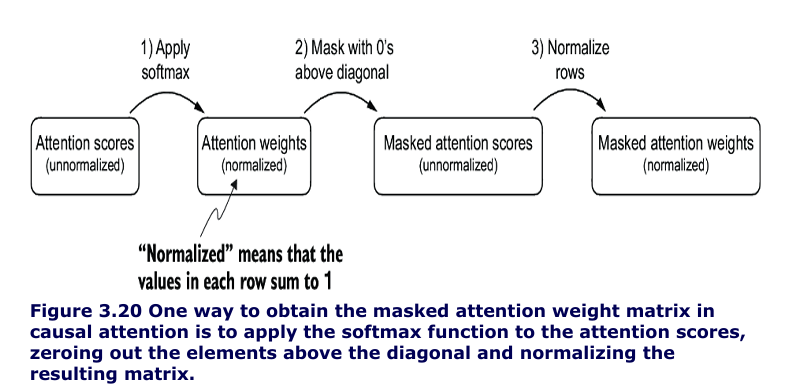

In [26]:
queries = self_atn_v2.W_query(inputs)
keys = self_atn_v2.W_key(inputs)
attn_score = queries@keys.T
attn_weights = torch.softmax(attn_score / keys.shape[-1]**0.5 ,dim=-1 )
attn_weights

tensor([[0.1921, 0.1646, 0.1652, 0.1550, 0.1721, 0.1510],
        [0.2041, 0.1659, 0.1662, 0.1496, 0.1665, 0.1477],
        [0.2036, 0.1659, 0.1662, 0.1498, 0.1664, 0.1480],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.1661, 0.1564],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.1585],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)

In [27]:
context_length = attn_score.shape[0]
mask_simple = torch.tril(torch.ones(context_length,context_length))
mask_simple

tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])

In [28]:
masked_simple =mask_simple*attn_weights
masked_simple

tensor([[0.1921, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2041, 0.1659, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2036, 0.1659, 0.1662, 0.0000, 0.0000, 0.0000],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.0000, 0.0000],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<MulBackward0>)

In [29]:
rows_sum = masked_simple.sum(dim=-1 ,keepdim =True)
masked_simple_norm = masked_simple/rows_sum
masked_simple_norm

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<DivBackward0>)

In [30]:
# masked_simple[0]
rows_sum

tensor([[0.1921],
        [0.3700],
        [0.5357],
        [0.6775],
        [0.8415],
        [1.0000]], grad_fn=<SumBackward1>)

### **Second or more correct way is :**
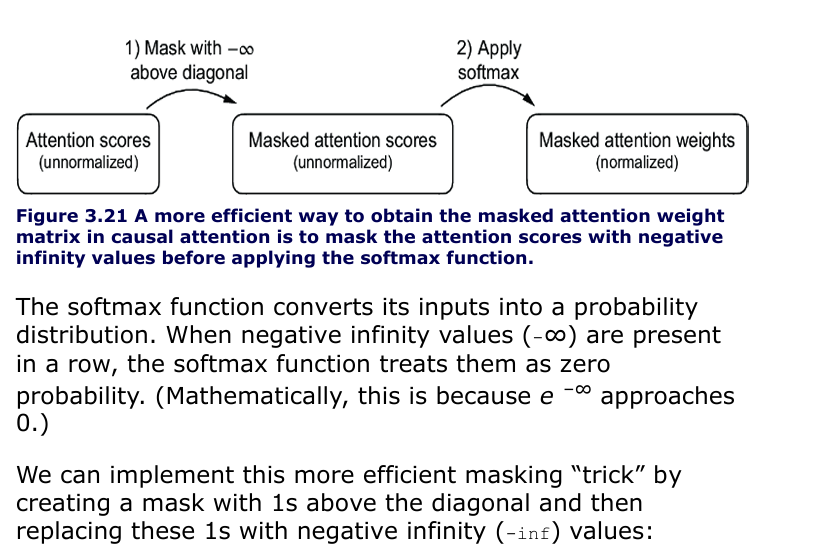

In [31]:
mask = torch.triu(torch.ones(context_length,context_length) ,diagonal =1)
masked  = attn_score.masked_fill(mask.bool(),-torch.inf)
print(masked)

tensor([[0.2899,   -inf,   -inf,   -inf,   -inf,   -inf],
        [0.4656, 0.1723,   -inf,   -inf,   -inf,   -inf],
        [0.4594, 0.1703, 0.1731,   -inf,   -inf,   -inf],
        [0.2642, 0.1024, 0.1036, 0.0186,   -inf,   -inf],
        [0.2183, 0.0874, 0.0882, 0.0177, 0.0786,   -inf],
        [0.3408, 0.1270, 0.1290, 0.0198, 0.1290, 0.0078]],
       grad_fn=<MaskedFillBackward0>)


In [32]:
attn_weights = torch.softmax(masked/keys.shape[-1]**0.5, dim=1)
attn_weights

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)

### Applying Dropout to attention weights

In [33]:
torch.manual_seed(123)
example =  torch.ones(6,6)
dropout =  torch.nn.Dropout(0.5)
dropout(example)
# print(example)

tensor([[2., 2., 2., 2., 2., 2.],
        [0., 2., 0., 0., 0., 0.],
        [0., 0., 2., 0., 2., 0.],
        [2., 2., 0., 0., 0., 2.],
        [2., 0., 0., 0., 0., 2.],
        [0., 2., 0., 0., 0., 0.]])

The results here are coming as 2 instead of because of the working of Dropout layer:- <br></br>
 To compensate for the dropped elements and maintain the overall scale of the tensor, the remaining elements are scaled up by
1
/
(
1
−
𝑝
)
 during training. This scaling ensures that the expected sum of the tensor remains constant.
 The values are 2 because the remaining elements are scaled up by
1
/
(
1
−
0.5
)
=
2
 to preserve the overall magnitude of the tensor. This behavior is by design to maintain proper training dynamics.

In [34]:
torch.manual_seed(123)
print(dropout(attn_weights))

tensor([[2.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.8966, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.6206, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4921, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4350, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.3327, 0.0000, 0.0000, 0.0000, 0.0000]],
       grad_fn=<MulBackward0>)


### Implementing a compact causal attention class

In [35]:
batch =torch.stack((inputs,inputs),dim=0)
print(batch.shape)

torch.Size([2, 6, 3])


In [36]:
class CasualAttention(nn.Module):
  def __init__ (self , d_in ,d_out,context_length ,dropout ,qkv_bias =False):
    super().__init__()
    self.d_out = d_out
    self.W_query = nn.Linear(d_in ,d_out ,bias =qkv_bias)
    self.W_key = nn.Linear(d_in ,d_out ,bias =qkv_bias)
    self.W_value = nn.Linear(d_in, d_out , bias =qkv_bias)
    self.dropout = nn.Dropout(dropout)

    self.register_buffer(
        'mask' ,
        torch.triu(torch.ones(context_length,context_length),
                   diagonal=1
        )
    )


  def forward(self ,x):

    b ,num_tokens ,d_in = x.shape
    queries = self.W_query(x)
    keys = self.W_key(x)
    values = self.W_value(x)

    attn_score = queries@keys.transpose(1,2)
    attn_score.masked_fill(
        self.mask.bool()[:num_tokens , :num_tokens] , -torch.inf
    )

    attn_weights = torch.softmax(attn_score/keys.shape[-1]**0.5 ,dim=-1)

    attn_weights = self.dropout(attn_weights)

    context_vec = attn_weights@values
    return context_vec


In [37]:
torch.manual_seed(123)
context_length = batch.shape[1]
ca = CasualAttention(d_in ,d_out ,context_length ,0.0)
context_vec = ca(batch)
print("context vec shape :" ,context_vec.shape)

context vec shape : torch.Size([2, 6, 2])


##**Multi -Head Attention**

 ### Stacking multiple single-head attention layers

In [38]:
class MultiHeadAttentionWrapper(nn.Module):
  def __init__(self , d_in ,d_out ,context_length ,dropout, num_heads , qkv_bias =False):
    super().__init__()
    self.heads = nn.ModuleList(
        [
            CasualAttention(d_in ,d_out ,context_length ,dropout ,qkv_bias)
            for _ in range(num_heads)
        ]
    )

  def forward(self,x):
      return torch.cat([head(x) for head in self.heads] , dim=-1 )


In [39]:
torch.manual_seed(123)
context_length = batch.shape[1]
d_in ,d_out = 3,2
mha = MultiHeadAttentionWrapper(d_in,d_out,context_length,0.0 ,num_heads =2)
context_vec = mha(batch)
print("context vector is " ,context_vec)
print(" \n context vec shape :" ,context_vec.shape)

context vector is  tensor([[[-0.5337, -0.1051,  0.5085,  0.3508],
         [-0.5323, -0.1080,  0.5084,  0.3508],
         [-0.5323, -0.1079,  0.5084,  0.3506],
         [-0.5297, -0.1076,  0.5074,  0.3471],
         [-0.5311, -0.1066,  0.5076,  0.3446],
         [-0.5299, -0.1081,  0.5077,  0.3493]],

        [[-0.5337, -0.1051,  0.5085,  0.3508],
         [-0.5323, -0.1080,  0.5084,  0.3508],
         [-0.5323, -0.1079,  0.5084,  0.3506],
         [-0.5297, -0.1076,  0.5074,  0.3471],
         [-0.5311, -0.1066,  0.5076,  0.3446],
         [-0.5299, -0.1081,  0.5077,  0.3493]]], grad_fn=<CatBackward0>)
 
 context vec shape : torch.Size([2, 6, 4])


### Multi-head attention with weight splits

In [41]:
class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        assert (d_out % num_heads == 0), \
            "d_out must be divisible by num_heads"

        self.d_out = d_out
        self.num_heads = num_heads
        self.head_dim = d_out // num_heads # Reduce the projection dim to match desired output dim

        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.out_proj = nn.Linear(d_out, d_out)  # Linear layer to combine head outputs
        self.dropout = nn.Dropout(dropout)
        self.register_buffer(
            "mask",
            torch.triu(torch.ones(context_length, context_length),
                       diagonal=1)
        )

    def forward(self, x):
        b, num_tokens, d_in = x.shape
        # As in `CausalAttention`, for inputs where `num_tokens` exceeds `context_length`,
        # this will result in errors in the mask creation further below.
        # In practice, this is not a problem since the LLM (chapters 4-7) ensures that inputs
        # do not exceed `context_length` before reaching this forwar

        keys = self.W_key(x) # Shape: (b, num_tokens, d_out)
        queries = self.W_query(x)
        values = self.W_value(x)

        # We implicitly split the matrix by adding a `num_heads` dimension
        # Unroll last dim: (b, num_tokens, d_out) -> (b, num_tokens, num_heads, head_dim)
        keys = keys.view(b, num_tokens, self.num_heads, self.head_dim)
        values = values.view(b, num_tokens, self.num_heads, self.head_dim)
        queries = queries.view(b, num_tokens, self.num_heads, self.head_dim)

        # Transpose: (b, num_tokens, num_heads, head_dim) -> (b, num_heads, num_tokens, head_dim)
        keys = keys.transpose(1, 2)
        queries = queries.transpose(1, 2)
        values = values.transpose(1, 2)

        # Compute scaled dot-product attention (aka self-attention) with a causal mask
        attn_scores = queries @ keys.transpose(2, 3)  # Dot product for each head

        # Original mask truncated to the number of tokens and converted to boolean
        mask_bool = self.mask.bool()[:num_tokens, :num_tokens]

        # Use the mask to fill attention scores
        attn_scores.masked_fill_(mask_bool, -torch.inf)

        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
        attn_weights = self.dropout(attn_weights)

        # Shape: (b, num_tokens, num_heads, head_dim)
        context_vec = (attn_weights @ values).transpose(1, 2)

        # Combine heads, where self.d_out = self.num_heads * self.head_dim
        context_vec = context_vec.contiguous().view(b, num_tokens, self.d_out)
        context_vec = self.out_proj(context_vec) # optional projection

        return context_vec



In [43]:
# (b, num_heads, num_tokens, head_dim) = (1, 2, 3, 4)
a = torch.tensor([[[[0.2745, 0.6584, 0.2775, 0.8573],
                    [0.8993, 0.0390, 0.9268, 0.7388],
                    [0.7179, 0.7058, 0.9156, 0.4340]],

                   [[0.0772, 0.3565, 0.1479, 0.5331],
                    [0.4066, 0.2318, 0.4545, 0.9737],
                    [0.4606, 0.5159, 0.4220, 0.5786]]]])

print(a @ a.transpose(2, 3))

tensor([[[[1.3208, 1.1631, 1.2879],
          [1.1631, 2.2150, 1.8424],
          [1.2879, 1.8424, 2.0402]],

         [[0.4391, 0.7003, 0.5903],
          [0.7003, 1.3737, 1.0620],
          [0.5903, 1.0620, 0.9912]]]])


In [48]:
first_head = a[0, 0, :, :]
first_head


tensor([[0.2745, 0.6584, 0.2775, 0.8573],
        [0.8993, 0.0390, 0.9268, 0.7388],
        [0.7179, 0.7058, 0.9156, 0.4340]])

In [49]:
first_head = a[0, 0, :, :]
first_res = first_head @ first_head.T
print("First head:\n", first_res)

second_head = a[0, 1, :, :]
second_res = second_head @ second_head.T
print("\nSecond head:\n", second_res)

First head:
 tensor([[1.3208, 1.1631, 1.2879],
        [1.1631, 2.2150, 1.8424],
        [1.2879, 1.8424, 2.0402]])

Second head:
 tensor([[0.4391, 0.7003, 0.5903],
        [0.7003, 1.3737, 1.0620],
        [0.5903, 1.0620, 0.9912]])


In [42]:
torch.manual_seed(123)

batch_size, context_length, d_in = batch.shape
d_out = 2
mha = MultiHeadAttention(d_in, d_out, context_length, 0.0, num_heads=2)

context_vecs = mha(batch)

print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)

tensor([[[0.3190, 0.4858],
         [0.2943, 0.3897],
         [0.2856, 0.3593],
         [0.2693, 0.3873],
         [0.2639, 0.3928],
         [0.2575, 0.4028]],

        [[0.3190, 0.4858],
         [0.2943, 0.3897],
         [0.2856, 0.3593],
         [0.2693, 0.3873],
         [0.2639, 0.3928],
         [0.2575, 0.4028]]], grad_fn=<ViewBackward0>)
context_vecs.shape: torch.Size([2, 6, 2])


In [53]:
context_length_gpt , d_in_gpt  , d_out_gpt = 1024 , 768 , 768
batch_gpt = torch.rand(context_length_gpt , d_in_gpt)
batch_gpt.shape

torch.Size([1024, 768])

In [54]:
batch_gpt =torch.stack((batch_gpt ,batch_gpt),dim=0)
print(batch_gpt.shape)

torch.Size([2, 1024, 768])


In [56]:
torch.manual_seed(143)
mha_gpt = MultiHeadAttention(d_in_gpt, d_out_gpt, context_length_gpt, 0.0, num_heads=12)

context_vec_gpt = mha_gpt(batch_gpt)
print(context_vec_gpt)
print("--"*40)
print("context vec gpt shape " , context_vec_gpt.shape)


tensor([[[ 0.2173,  0.0112, -0.1540,  ..., -0.0959,  0.0273, -0.0632],
         [ 0.1282, -0.0097, -0.0764,  ..., -0.0756, -0.0106,  0.0067],
         [ 0.1474, -0.0185, -0.0425,  ..., -0.0657, -0.0279, -0.0062],
         ...,
         [ 0.1369, -0.0782,  0.0214,  ...,  0.0170,  0.0103, -0.0833],
         [ 0.1367, -0.0783,  0.0215,  ...,  0.0173,  0.0101, -0.0829],
         [ 0.1368, -0.0786,  0.0217,  ...,  0.0172,  0.0097, -0.0830]],

        [[ 0.2173,  0.0112, -0.1540,  ..., -0.0959,  0.0273, -0.0632],
         [ 0.1282, -0.0097, -0.0764,  ..., -0.0756, -0.0106,  0.0067],
         [ 0.1474, -0.0185, -0.0425,  ..., -0.0657, -0.0279, -0.0062],
         ...,
         [ 0.1369, -0.0782,  0.0214,  ...,  0.0170,  0.0103, -0.0833],
         [ 0.1367, -0.0783,  0.0215,  ...,  0.0173,  0.0101, -0.0829],
         [ 0.1368, -0.0786,  0.0217,  ...,  0.0172,  0.0097, -0.0830]]],
       grad_fn=<ViewBackward0>)
--------------------------------------------------------------------------------
con